In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import seaborn as sns
import warnings
from scipy.stats import linregress
import scipy.stats as st

In [2]:
warnings.filterwarnings('ignore')

# Read in titles data files and create combined DataFrame

In [18]:
# Data files
netflix_path = "../data/netflix_titles.csv"
disney_path = "../data/disney_plus_titles.csv"

# Read the Netflix and Disney+ data
netflix_data = pd.read_csv(netflix_path)
disney_data = pd.read_csv(disney_path)


In [19]:
# Create Netflix dataframe and review length
netflix_df = pd.DataFrame(netflix_data)
len(netflix_df)

8807

In [20]:
# Netflix date_added is the key column for filtering to 2019 - 2021 to align with Disney+ dataset date_added dates
# The following steps trim the "September 24, 2018" dates to remove extra spaces
netflix_df['date_added'] = netflix_df['date_added'].str.strip()
# netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# There are a handful of blank date_added that will impact date filtering
netflix_blank_dates = netflix_df[netflix_df['date_added'].isna()]
len(netflix_blank_dates)

10

In [21]:
# Drop rows with blank dates
netflix_df = netflix_df.dropna(subset=['date_added'])

# Verify the number of rows with blank dates after dropping
len(netflix_df[netflix_df['date_added'].isna()])

0

In [22]:
# Extract only the date portion and convert it to string
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['date_added'] = netflix_df['date_added'].dt.date.astype(str)


In [23]:
# Filter out for dates greater than January 1, 2019
netflix_df = netflix_df.loc[(netflix_df['date_added'] >= '2019-01-01') & (netflix_df['date_added'] <= '2021-12-31')]
len(netflix_df)

5393

In [24]:
# Create Disney+ dataframe and review length
disney_df = pd.DataFrame(disney_data)
len(disney_df)

1450

In [25]:
# There are a handful of blank date_added that will impact data
disney_blank_dates = disney_df[disney_df['date_added'].isna()]
len(disney_blank_dates)

3

In [26]:
# Drop rows with blank dates
disney_df = disney_df.dropna(subset=['date_added'])

# Verify the number of rows with blank dates after dropping
len(disney_df[disney_df['date_added'].isna()])

0

In [27]:
# Extract only the date portion and convert it to string
disney_df['date_added'] = pd.to_datetime(disney_df['date_added'], errors='coerce')
disney_df['date_added'] = disney_df['date_added'].dt.date.astype(str)

In [28]:
# Add platform column to each streaming service to maintain association
netflix_df.loc[:, "platform"] = "Netflix"
disney_df.loc[:, "platform"] = "Disney+"


In [29]:
# Concatenate Netflix and Disney+ dataframes
combined_df = pd.concat([netflix_df, disney_df], ignore_index=True)
len(combined_df)

6840

In [30]:
# Find duplicate titles to analyze cross over content
duplicate_titles = combined_df[combined_df.duplicated(subset=['title'])]
len(duplicate_titles)

22

In [31]:
# Extract the primary genre from listed_in by pulling the first values within the list
combined_df['listed_in'] = combined_df['listed_in'].astype(str)
combined_df['listed_in'] = combined_df['listed_in'].str.split(',')
combined_df['primary_genre'] = combined_df['listed_in'].str.get(0)

In [32]:
# Clean dataframe with columns of importance for data analysis
combined_df = combined_df.loc[:, ['title', 'type','release_year', 'primary_genre', 'platform', 'date_added']]

In [33]:
# Enter in field value replacements for genre normalization (i.e. Documentaries and Docuseries to Documentary)
data_iteration_1 = combined_df.replace(to_replace='Animation', value = 'Animated')
data_iteration_2 = data_iteration_1.replace(to_replace=['Docuseries', 'Documentaries'], value = 'Documentary')
data_iteration_3 = data_iteration_2.replace(to_replace=['Biographical', 'Historical'], value = 'Historical')
data_iteration_4 = data_iteration_3.replace(to_replace=['Thriller', 'Crime'], value = 'Thriller/Crime')
data_iteration_5 = data_iteration_4.replace(to_replace=['Stand-UpComedy&Talk', 'Comedies'], value = 'Comedy')
data_iteration_6 = data_iteration_5.replace(to_replace=['Stand-UpComedy', 'Buddy'], value = 'Comedy')
data_iteration_7 = data_iteration_6.replace(to_replace=['Classic Movies', 'Classic&Cult'], value = 'Classic/Cult/Independent')
data_iteration_8 = data_iteration_7.replace(to_replace='IndependentMovies', value = 'Classic/Cult/Independent')
data_iteration_9 = data_iteration_8.replace(to_replace=['Horror', 'HorrorMovies'], value = 'Horror')
data_iteration_10 = data_iteration_9.replace(to_replace=['Music&Musicals', 'ConcertFilm'], value = 'Music/Musicals')
data_iteration_11 = data_iteration_10.replace(to_replace=['Music', 'Musical'], value = 'Music/Musicals')
data_iteration_12 = data_iteration_11.replace(to_replace='Dance', value = 'Music/Musicals')
data_iteration_13 = data_iteration_12.replace(to_replace=['Family', 'Kids'], value = 'Family/Kids')
data_iteration_14 = data_iteration_13.replace(to_replace=["Kids'", 'Children&FamilyMovies'], value = 'Family/Kids')
data_iteration_15 = data_iteration_14.replace(to_replace=['ScienceFiction', 'Fantasy'], value = 'SciFi/Fantasy')
data_iteration_16 = data_iteration_15.replace(to_replace='Sci-Fi&Fantasy', value = 'SciFi/Fantasy')
data_iteration_17 = data_iteration_16.replace(to_replace=['Action-Adventure', 'Action&Adventure'], value = 'Action/Adventure')
data_iteration_18 = data_iteration_17.replace(to_replace=['International', 'InternationalMovies'], value = 'International')
data_iteration_19 = data_iteration_18.replace(to_replace=['TV Dramas', 'Dramas'], value = 'Drama')
data_iteration_20 = data_iteration_19.replace(to_replace=['Gameshow/Competition', 'Reality TV'], value = 'Reality')
data_iteration_21 = data_iteration_20.replace(to_replace=['Movies', 'Series'], value = 'Behind the Scenes')
data_iteration_22 = data_iteration_21.replace(to_replace=['International TV Shows', 'International Movies'], value = 'International')
data_iteration_23 = data_iteration_22.replace(to_replace=['Crime TV Shows', 'Thrillers'], value = 'Thriller/Crime')
data_iteration_24 = data_iteration_23.replace(to_replace=['TV Comedies', 'Stand-Up Comedy'], value = 'Comedy')
data_iteration_25 = data_iteration_24.replace(to_replace=['Horror Movies', 'TV Horror'], value = 'Horror')
data_iteration_26 = data_iteration_25.replace(to_replace=["Kids' TV", 'Children & Family Movies'], value = 'Family/Kids')
data_iteration_27 = data_iteration_26.replace(to_replace='Anthology', value = 'Behind the Scenes')
data_iteration_28 = data_iteration_27.replace(to_replace=['Action & Adventure', 'TV Action & Adventure'], value = 'Action/Adventure')
data_iteration_29 = data_iteration_28.replace(to_replace='Stand-Up Comedy & Talk Shows', value = 'Comedy')
data_iteration_30 = data_iteration_29.replace(to_replace=['Classic & Cult TV', 'Cult Movies'], value = 'Classic/Cult/Independent')
data_iteration_31 = data_iteration_30.replace(to_replace='Anime Features', value = 'Anime')
data_iteration_32 = data_iteration_31.replace(to_replace=['Sci-Fi & Fantasy', 'Science Fiction'], value = 'SciFi/Fantasy')
data_iteration_33 = data_iteration_32.replace(to_replace=['Music & Musicals', 'Concert Film'], value = 'Music/Musicals')
data_iteration_34 = data_iteration_33.replace(to_replace=['Romantic TV Shows', 'Lifestyle'], value = 'Reality')
data_iteration_35 = data_iteration_34.replace(to_replace=['British TV Shows', 'Spanish-Language TV Shows'], value = 'TV Shows')
data_iteration_36 = data_iteration_35.replace(to_replace='Anime Series', value = 'Anime')
data_iteration_37 = data_iteration_36.replace(to_replace='Independent Movies', value = 'Classic/Cult/Independent')
data_iteration_38 = data_iteration_37.replace(to_replace=['Talk Show', 'Game Show / Competition'], value = 'TV Shows')
data_iteration_39 = data_iteration_38.replace(to_replace='Variety', value = 'TV Shows')
combined_df = data_iteration_39

In [34]:
#Display unique count of genres
genres = combined_df['primary_genre'].unique()
len(genres)

22

In [35]:
# Convert 'date_added' column to datetime
combined_df['date_added'] = pd.to_datetime(combined_df['date_added'])
# Extract year from 'date_added' and store it in a new column 'year_added'
combined_df['year_added'] = combined_df['date_added'].dt.year

combined_df.head()

,title,type,release_year,primary_genre,platform,date_added,year_added
0,Dick Johnson Is Dead,Movie,2020,Documentary,Netflix,2021-09-25,2021
1,Blood & Water,TV Show,2021,International,Netflix,2021-09-24,2021
2,Ganglands,TV Show,2021,Thriller/Crime,Netflix,2021-09-24,2021
3,Jailbirds New Orleans,TV Show,2021,Documentary,Netflix,2021-09-24,2021
4,Kota Factory,TV Show,2021,International,Netflix,2021-09-24,2021


# Genre and Type composition plotting

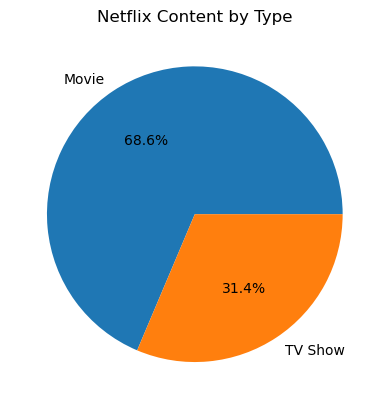

In [36]:
# Netflix pie chart for movie/tv shows
netflix_titles = combined_df.loc[combined_df["platform"] == "Netflix", :]
netflix_by_type = netflix_titles.groupby(['type'])['type'].count()
netflix_types = netflix_by_type.index
plt.pie(netflix_by_type, labels=netflix_types, autopct="%1.1f%%")
plt.title("Netflix Content by Type")
plt.savefig(os.path.join('../output', 'Netflix_Content_by_Type.png'))
plt.show()

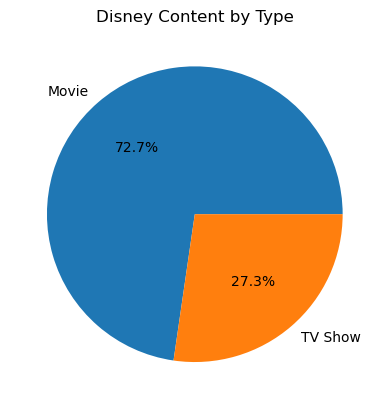

In [37]:
# Disney pie chart for movie/tv shows
disney_titles = combined_df.loc[combined_df["platform"] == "Disney+", :]
disney_by_type = disney_titles.groupby(['type'])['type'].count()
disney_types = disney_by_type.index
plt.pie(disney_by_type, labels=disney_types, autopct="%1.1f%%")
plt.title("Disney Content by Type")
plt.savefig(os.path.join('../output', 'Disney_Content_by_Type.png'))
plt.show()

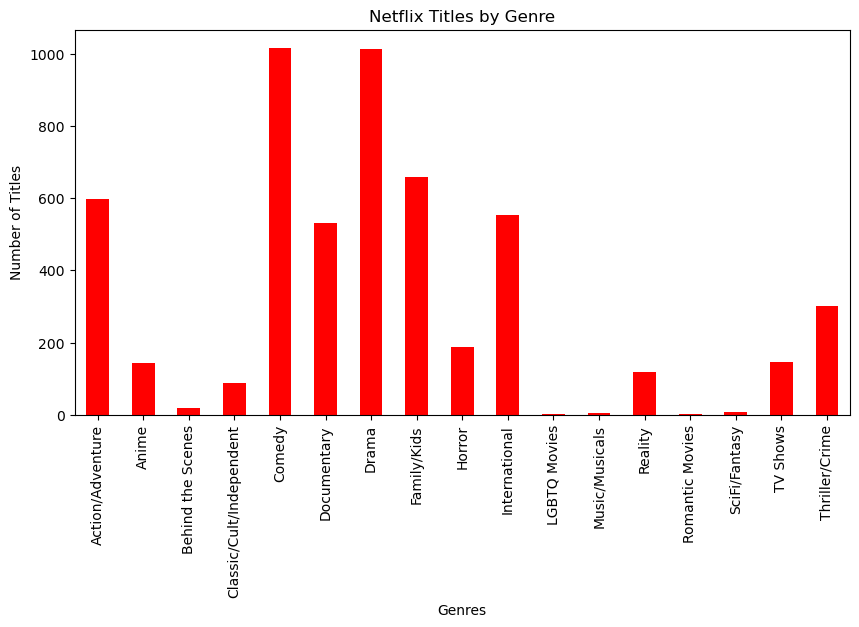

In [38]:
# Netflix bar chart for primary genre counts
netflix_combined = combined_df.loc[combined_df["platform"] == "Netflix", :]
netflix_genres_titles = netflix_combined.groupby(['primary_genre'])['title'].count()
netflix_gt_plot = netflix_genres_titles.plot(kind='bar', 
                                             figsize=(10,5), 
                                             color = 'red', 
                                             title = 'Netflix Titles by Genre', 
                                             xlabel= 'Genres', 
                                             ylabel='Number of Titles')
plt.savefig(os.path.join('../output', 'Netflix_Content_by_Genre.png'))
plt.show()

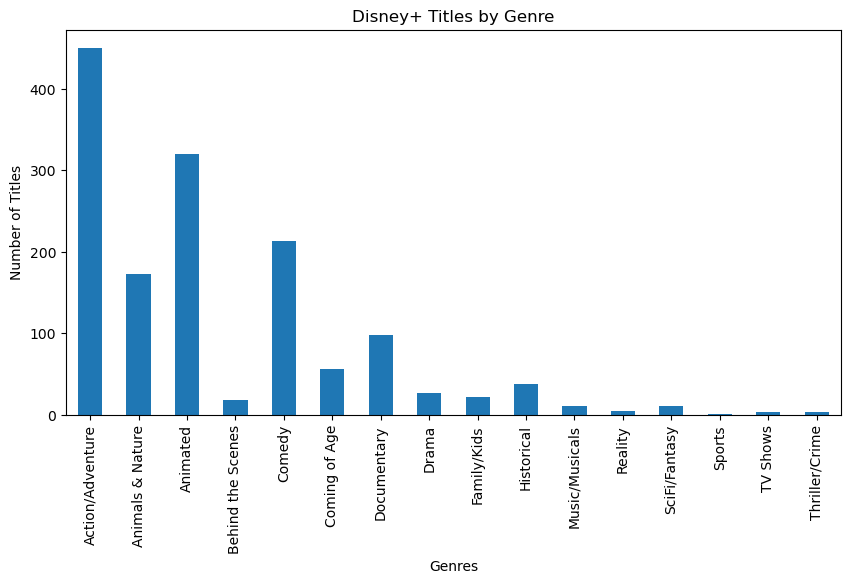

In [39]:
# Disney bar chart for primary genre counts
disney_combined = combined_df.loc[combined_df["platform"] == "Disney+", :]
disney_genres_titles = disney_combined.groupby(['primary_genre'])['title'].count()
disney_gt_plot = disney_genres_titles.plot(kind='bar', 
                                           figsize=(10,5), 
                                           title = 'Disney+ Titles by Genre', 
                                           xlabel= 'Genres', 
                                           ylabel='Number of Titles')
plt.savefig(os.path.join('../output', 'Disney_Content_by_Genre.png'))
plt.show()

# Release year plotting

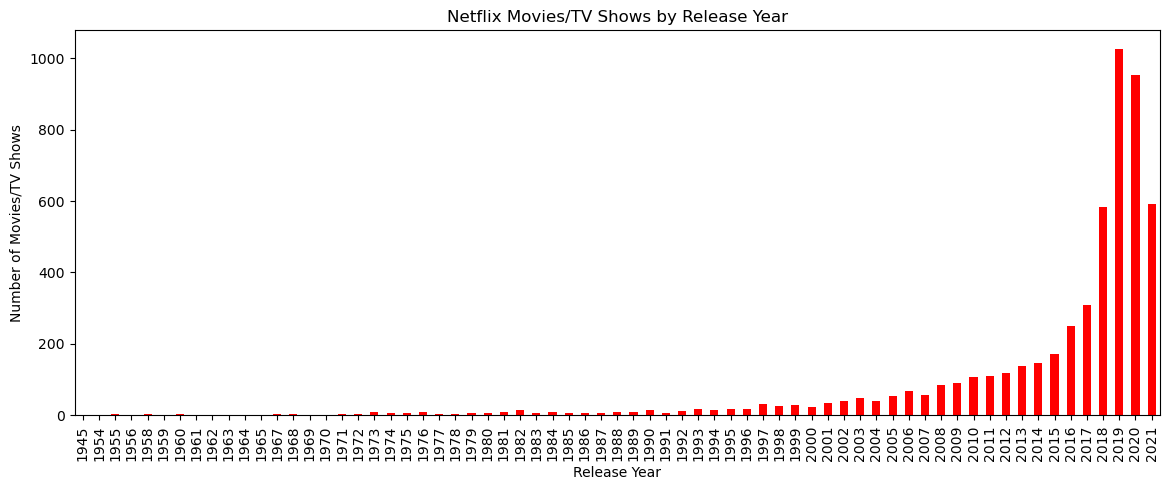

In [40]:
# Netflix bar or line chart for release years
net_relyr_groups = netflix_df.groupby('release_year')
net_relyr = net_relyr_groups['show_id'].count()
net_relyr_plot = net_relyr.plot(kind='bar', figsize=(14,5), color = 'red', title = 'Netflix Movies/TV Shows by Release Year', 
                                xlabel= 'Release Year', ylabel='Number of Movies/TV Shows')
plt.savefig(os.path.join('../output', 'Netflix_Release_Years.png'))
plt.show()

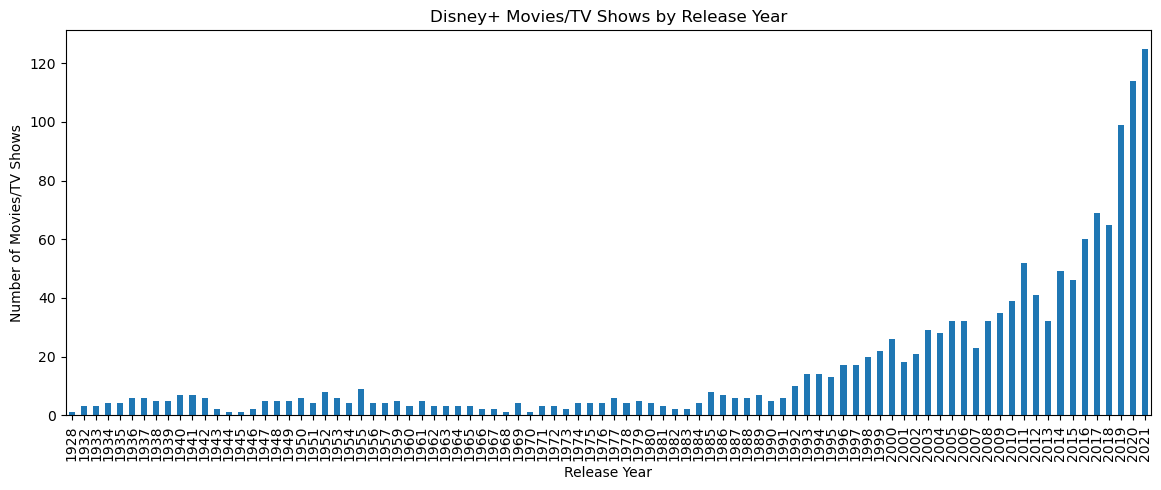

In [41]:
# Disney bar or line chart for release years
dis_relyr_groups = disney_df.groupby('release_year')
dis_relyr = dis_relyr_groups['show_id'].count()
dis_relyr_plot = dis_relyr.plot(kind='bar', figsize=(14,5), title = 'Disney+ Movies/TV Shows by Release Year', 
                                xlabel= 'Release Year', ylabel='Number of Movies/TV Shows')
plt.savefig(os.path.join('../output', 'Disney_Release_Years.png'))
plt.show()

# Read in price data file and create DataFrame

In [42]:
# Create Subscription Price dataframe and review length
prices_path = "../data/subscription_prices.csv"
prices_data = pd.read_csv(prices_path)
prices_df = pd.DataFrame(prices_data)
len(prices_df)

777

# Subscription Price plotting

In [43]:
# Data Isolation
netflix_only = prices_df.loc[prices_df["service"] == "Netflix", :]
disney_only = prices_df.loc[prices_df["service"] == "Disney+", :]

In [44]:
# Datetime Source: https://www.tutorialspoint.com/plotting-dates-on-the-x-axis-with-python-s-matplotlib
netflix_only['date'] = pd.to_datetime(netflix_only['date'])
disney_only['date'] = pd.to_datetime(disney_only['date'])

In [45]:
# Data Merging
subscription_data = pd.merge(netflix_only, disney_only, on="date")

In [46]:
# Dataframe modification
organized_data = subscription_data[["date","price_x","price_y"]]
renamed_data = organized_data.rename(columns={"price_x":"netflix_price", "price_y":"disney_price"})

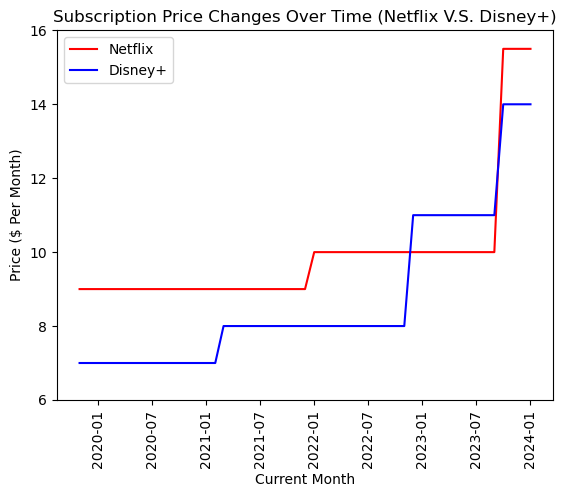

In [47]:
# Line chart for subscription prices
time = pd.to_datetime(renamed_data['date'])
netflix_prices = renamed_data['netflix_price']
disney_prices = renamed_data['disney_price']
netflix_chart, = plt.plot(time, netflix_prices, color="red", label="Netflix")
disney_chart, = plt.plot(time, disney_prices, color="blue", label="Disney+")
plt.title("Subscription Price Changes Over Time (Netflix V.S. Disney+)")
plt.xlabel("Current Month")
plt.ylabel("Price ($ Per Month)")
plt.xticks(rotation="vertical")
plt.ylim(6,16)
plt.legend(handles=[netflix_chart, disney_chart], loc="best")
plt.savefig(os.path.join('../output', 'Subscription_Price_Changes_Over_Time.png'))
plt.show()

# Create DataFrame for most recently added titles

In [48]:
# Sorted data frames by date_added
sorted_netflix_df = netflix_df.sort_values(by = 'date_added', ascending=False)
sorted_disney_df = disney_df.sort_values(by = 'date_added', ascending=False)

In [49]:
# Most recently added 500 titles per platform
recentadd_netflix_df = sorted_netflix_df.head(600)
recentadd_disney_df = sorted_disney_df.head(600)

In [50]:
# Concatenate recentadd Netflix and Disney+ dataframes
recentadd_df = pd.concat([recentadd_netflix_df, recentadd_disney_df], ignore_index=True)
len(recentadd_df)

1200

In [51]:
# Extract the primary genre from listed_in by pulling the first values within the list
recentadd_df['listed_in'] = recentadd_df['listed_in'].str.split(',')
recentadd_df['primary_genre'] = recentadd_df['listed_in'].str.get(0)

In [52]:
# Clean dataframe with columns of importance for data analysis
recentadd_df = recentadd_df.loc[:, ['title', 'type','release_year', 'primary_genre', 'platform', 'date_added']]

In [53]:
# Add empty columns for IMDb metadata to be pulled from API
recentadd_df['imdb_id'] = ''
recentadd_df['imdb_rating'] = ''
recentadd_df['imdb_votes'] = ''
recentadd_df['box_office_sales'] = ''
recentadd_df['production_cost'] = ''

# Call OMDB API to pull metadata into DataFrame / Save output

In [61]:
import time
# Import the OMDB API key
from api_keys import omdb_api_key

In [62]:
# TEST
# Response 200 testing
# url = "http://www.omdbapi.com/?t="
# api_key = "&apikey=" + omdb_api_key
# response = requests.get(url + "Aliens" + api_key, verify=False)
# print(response)

In [63]:
# TEST
# Printing API URLs out

# Establishing base URL for OMDB API
# url = "http://www.omdbapi.com/"

# Construct the API request URL with the title and API key
# params = {
#        'apikey': omdb_api_key,
#    }

# Loop through each title in the 'title' column of combined_df
# for index, row in combined_df.iterrows():
#    time.sleep(2) # Add a delay to avoid hitting the API too quickly
    
#    title = row['title']
#    params['t'] = title # get title from combined_df
    
# Construct the API URL
#    api_url = url + "?" + "&".join([f"{key}={value}" for key, value in params.items()])

# Print the API URL for the current title
#    print("API URL for", title, ":", api_url)


In [64]:
# Establishing base URL for OMDB API
url = "http://www.omdbapi.com/"

# Construct the API request URL with the title and API key
params = {
        'apikey': omdb_api_key,
    }

# Loop through each title in the 'title' column of combined_df
for index, row in recentadd_df.iterrows():
    time.sleep(1) # Add a delay to avoid hitting the API too quickly
    
    title = row['title'] # get title from current row
    params['t'] = title # establish "t" parameter for current title
 
   # Run an API request for each of the titles
    try:
        # Parse the JSON and retrieve data
        omdb_response = requests.get(url, params=params, verify=False)
        omdb_data = omdb_response.json()
    
    # Parse out OMDB ratings, votes, etc.
        id = omdb_data.get('imdbID')
        rating = omdb_data.get('imdbRating')
        votes = omdb_data.get('imdbVotes')
        box_office_sales = omdb_data.get('BoxOffice')
        prod_cost = omdb_data.get('Production')
        
    # Assign OMDB information into combined_df
        recentadd_df.at[index, "imdb_id"] = id
        recentadd_df.at[index, "imdb_rating"] = rating
        recentadd_df.at[index, "imdb_votes"] = votes 
        recentadd_df.at[index, "box_office_sales"] = box_office_sales 
        recentadd_df.at[index, "production_cost"] = prod_cost

                             
        print(f"Data retrieved for '{title}': imdbRating = {rating}, imdbVotes = {votes}")
    except Exception as e:
        print(f"Failed to fetch data for '{title}': {e}")

Data retrieved for 'Dick Johnson Is Dead': imdbRating = 7.4, imdbVotes = 7,204
Data retrieved for 'My Little Pony: A New Generation': imdbRating = 6.8, imdbVotes = 4,475
Data retrieved for 'Vendetta: Truth, Lies and The Mafia': imdbRating = None, imdbVotes = None
Data retrieved for 'The Starling': imdbRating = 6.4, imdbVotes = 15,290
Data retrieved for 'The Great British Baking Show': imdbRating = 8.6, imdbVotes = 12,807
Data retrieved for 'Sankofa': imdbRating = 7.0, imdbVotes = 784
Data retrieved for 'Blood & Water': imdbRating = 6.7, imdbVotes = 4,132
Data retrieved for 'Midnight Mass': imdbRating = 7.7, imdbVotes = 143,786
Data retrieved for 'Ganglands': imdbRating = 7.2, imdbVotes = 4,524
Data retrieved for 'Kota Factory': imdbRating = 9.0, imdbVotes = 80,073
Data retrieved for 'Jailbirds New Orleans': imdbRating = 6.6, imdbVotes = 299
Data retrieved for 'Je Suis Karl': imdbRating = 5.5, imdbVotes = 1,559
Data retrieved for 'Bangkok Breaking': imdbRating = 5.8, imdbVotes = 359
Dat

In [65]:
# Show record count
recentadd_df.count()

title               1200
type                1200
release_year        1200
primary_genre       1200
platform            1200
date_added          1200
imdb_id             1046
imdb_rating         1046
imdb_votes          1046
box_office_sales     682
production_cost      682
dtype: int64

In [66]:
# Display new DataFrame with new OMDB metadata
recentadd_df.head()

,title,type,release_year,primary_genre,platform,date_added,imdb_id,imdb_rating,imdb_votes,box_office_sales,production_cost
0,Dick Johnson Is Dead,Movie,2020,Documentaries,Netflix,2021-09-25,tt11394180,7.4,"7,204",N/A,N/A
1,My Little Pony: A New Generation,Movie,2021,Children & Family Movies,Netflix,2021-09-24,tt10101702,6.8,"4,475",N/A,N/A
2,"Vendetta: Truth, Lies and The Mafia",TV Show,2021,Crime TV Shows,Netflix,2021-09-24,None,None,None,None,None
3,The Starling,Movie,2021,Comedies,Netflix,2021-09-24,tt5164438,6.4,"15,290",N/A,N/A
4,The Great British Baking Show,TV Show,2021,British TV Shows,Netflix,2021-09-24,tt1877368,8.6,"12,807",None,None


In [67]:
# Export the recentadd_rated_df into a csv
# recentadd_df.to_csv("../output/recentadd_rated.csv", index_label="index")

# Read in ratings data file and create DataFrame

In [3]:
# New ratings file
new_data_path = "../output/recentadd_rated.csv"

In [8]:
# Read the new Netflix and Disney+ data
new_combined_data = pd.read_csv(new_data_path)
new_combined_df= pd.DataFrame(new_combined_data)
len(new_combined_df)

1200

In [9]:
# Find "None" and "N/A" values for each platform
# Count blank values in each column
blank_counts = new_combined_df.isna().sum()

# Print the results
print("Number of blank values in each column:")
print(blank_counts)

Number of blank values in each column:
index                  0
title                  0
type                   0
release_year           0
primary_genre          0
platform               0
date_added             0
imdb_id              154
imdb_rating          227
imdb_votes           171
box_office_sales     913
production_cost     1198
dtype: int64


In [10]:
# Find "None" and "N/A" values for each platform
# NaN values for each platform
platforms = new_combined_df['platform'].unique()

# Iterate over each platform
for platform in platforms:
    platform_df = new_combined_df[new_combined_df['platform'] == platform]
    
    # Count blank values for each column
    blank_counts = platform_df.isna().sum()
    
    # Print results
    print(f"For platform {platform}:")
    print("Number of blank values in each column:")
    print(blank_counts)
    print("\n")

For platform Netflix:
Number of blank values in each column:
index                 0
title                 0
type                  0
release_year          0
primary_genre         0
platform              0
date_added            0
imdb_id              55
imdb_rating          83
imdb_votes           66
box_office_sales    447
production_cost     598
dtype: int64


For platform Disney+:
Number of blank values in each column:
index                 0
title                 0
type                  0
release_year          0
primary_genre         0
platform              0
date_added            0
imdb_id              99
imdb_rating         144
imdb_votes          105
box_office_sales    466
production_cost     600
dtype: int64




In [11]:
# Remove "None" and "N/A" values to create clean dataframe
new_combined_df.dropna(subset=['imdb_rating', 'imdb_votes'], inplace=True)
new_combined_df.drop(columns=['index','box_office_sales',	'production_cost'], inplace=True)
len(new_combined_df)

973

# Generate Summary Statistics for each platform

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM for IMDB ratings

mean= new_combined_df['imdb_rating'].groupby(new_combined_df['platform']).mean()
median= new_combined_df['imdb_rating'].groupby(new_combined_df['platform']).median()
var= new_combined_df['imdb_rating'].groupby(new_combined_df['platform']).var()
std= new_combined_df['imdb_rating'].groupby(new_combined_df['platform']).std()
sem= new_combined_df['imdb_rating'].groupby(new_combined_df['platform']).sem()

imdb_rating_summary_df=pd.DataFrame({'Mean IMDB Rating': mean,
                         'Median IMDB Rating': median,
                         'IMDB Rating Variance':var,
                         'IMDB Rating Std. Dev.':std,
                         'IMDB Rating Std. Err.':sem})

imdb_rating_summary_df

,Mean IMDB Rating,Median IMDB Rating,IMDB Rating Variance,IMDB Rating Std. Dev.,IMDB Rating Std. Err.
platform,,,,,
Disney+,6.720833,6.8,1.125609,1.060947,0.049683
Netflix,6.510445,6.6,1.411557,1.188090,0.052252


In [13]:
# Remove commas from the specified column
new_combined_df['imdb_votes']   = new_combined_df['imdb_votes'].str.replace(',', '')

# Convert the column to float
new_combined_df['imdb_votes']  = new_combined_df['imdb_votes'] .astype(float)

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 

mean= new_combined_df['imdb_votes'].groupby(new_combined_df['platform']).mean()
median= new_combined_df['imdb_votes'].groupby(new_combined_df['platform']).median()
var= new_combined_df['imdb_votes'].groupby(new_combined_df['platform']).var()
std= new_combined_df['imdb_votes'].groupby(new_combined_df['platform']).std()
sem= new_combined_df['imdb_votes'].groupby(new_combined_df['platform']).sem()

imdb_votes_summary_df=pd.DataFrame({'Mean IMDB Votes': mean,
                         'Median IMDB Votes': median,
                         'IMDB Votes Variance':var,
                         'IMDB Votes Std. Dev.':std,
                         'IMDB Votes Std. Err.':sem})

imdb_votes_summary_df

,Mean IMDB Votes,Median IMDB Votes,IMDB Votes Variance,IMDB Votes Std. Dev.,IMDB Votes Std. Err.
platform,,,,,
Disney+,61690.427632,2430.0,1.876574e+10,136988.086225,6415.054896
Netflix,61179.787234,6159.0,3.085073e+10,175643.753130,7724.803430


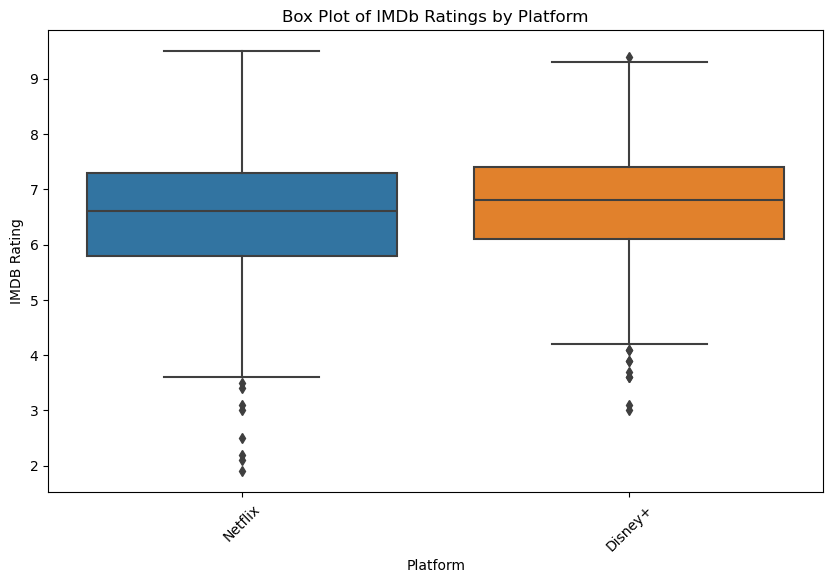

In [15]:
# Generate a box plot that shows the distrubution of IMDB rating for each platform.
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_combined_df, x='platform', y='imdb_rating')
plt.title('Box Plot of IMDb Ratings by Platform')
plt.xlabel('Platform')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45)
# Save the plot to the output folder
plt.savefig(os.path.join('../output', 'BoxPlot_of_IMDbRatings_Platform.png'))
plt.show()

# Correlation and Regression for Netflix

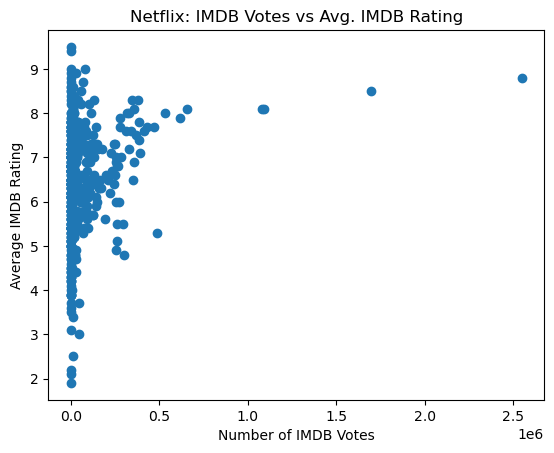

In [27]:
# Generate a scatter plot of IMDB Votes vs. the average rating for Netflix
netflix_data= new_combined_df.loc[new_combined_df['platform']=='Netflix'].groupby('imdb_id')
netflix_avg_imdb_rating = netflix_data['imdb_rating'].mean()
netflix_imdb_vote = netflix_data["imdb_votes"].unique()
plt.scatter(netflix_imdb_vote, netflix_avg_imdb_rating)
plt.xlabel("Number of IMDB Votes")
plt.ylabel("Average IMDB Rating")
plt.title("Netflix: IMDB Votes vs Avg. IMDB Rating")
plt.show()

The correlation between IMDB votes and the average IMDB rating is 0.2089.


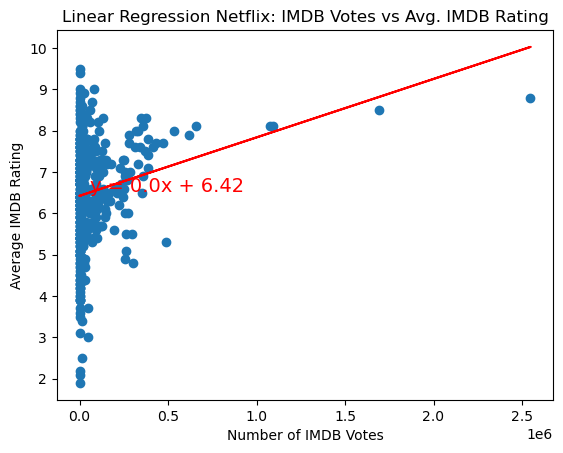

In [28]:
# Calculate the correlation coefficient and a linear regression model for IMDB Votes vs. the average rating for Netflix
correlation = st.pearsonr(netflix_imdb_vote, netflix_avg_imdb_rating)
rounded_corr = round(float(correlation[0]), 4)
netflix_imdb_vote = netflix_imdb_vote.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(netflix_imdb_vote, netflix_avg_imdb_rating)
line_eq = f'y = {(round(slope,5))}x + {(round(intercept,2))}'
regress_values = netflix_imdb_vote * slope + intercept
plt.scatter(netflix_imdb_vote, netflix_avg_imdb_rating)
plt.plot(netflix_imdb_vote,regress_values,"r-")
x_mean = np.mean(netflix_imdb_vote)
y_mean = np.mean(netflix_avg_imdb_rating)
x_text = x_mean
y_text = slope * x_mean + intercept
plt.annotate( line_eq,(x_text,y_text), fontsize=14, color='red')
plt.xlabel("Number of IMDB Votes")
plt.ylabel("Average IMDB Rating")
plt.title("Linear Regression Netflix: IMDB Votes vs Avg. IMDB Rating")
print(f"The correlation between IMDB votes and the average IMDB rating is {rounded_corr}.")
# Save the plot to the output folder
plt.savefig(os.path.join('../output', 'Linear_Regression_Netflix.png'))
plt.show()

# Correlation and Regression for Disney+

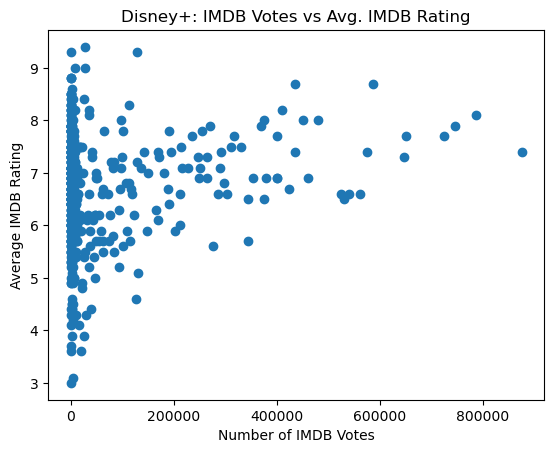

In [31]:
# Generate a scatter plot of IMDB votes vs. the average rating for Disney+
disney_data= new_combined_df.loc[new_combined_df['platform']=='Disney+'].groupby('imdb_id')
disney_avg_imdb_rating = disney_data['imdb_rating'].mean()
disney_imdb_vote = disney_data["imdb_votes"].unique()
plt.scatter(disney_imdb_vote, disney_avg_imdb_rating)
plt.xlabel("Number of IMDB Votes")
plt.ylabel("Average IMDB Rating")
plt.title("Disney+: IMDB Votes vs Avg. IMDB Rating")
plt.show()

The correlation between IMDB votes and the average IMDB rating is 0.1647.


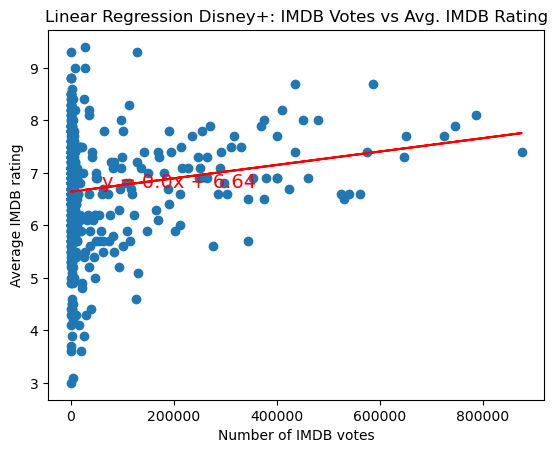

In [32]:
# Calculate the correlation coefficient and a linear regression model for IMDB Votes vs. the average rating for Disney+
correlation = st.pearsonr(disney_imdb_vote, disney_avg_imdb_rating)
rounded_corr = round(float(correlation[0]), 4)
disney_imdb_vote = disney_imdb_vote.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(disney_imdb_vote, disney_avg_imdb_rating)
line_eq = f'y = {(round(slope,5))}x + {(round(intercept,2))}'
regress_values = disney_imdb_vote * slope + intercept
plt.scatter(disney_imdb_vote, disney_avg_imdb_rating)
plt.plot(disney_imdb_vote,regress_values,"r-")
x_mean = np.mean(disney_imdb_vote)
y_mean = np.mean(disney_avg_imdb_rating)
x_text = x_mean
y_text = slope * x_mean + intercept
plt.annotate( line_eq,(x_text,y_text), fontsize=14, color='red')
plt.xlabel("Number of IMDB votes")
plt.ylabel("Average IMDB rating")
plt.title("Linear Regression Disney+: IMDB Votes vs Avg. IMDB Rating")
print(f"The correlation between IMDB votes and the average IMDB rating is {rounded_corr}.")
# Save the plot to the output folder
plt.savefig(os.path.join('../output', 'Linear_Regression_Disney.png'))
plt.show()

In [ ]:
# end